# Homework 2: Machine Learning, Feature Engineering, validation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
X_train = np.array(pd.read_csv('F_X'))
y_train = np.array(pd.read_csv('F_y'))
X_test = np.array(pd.read_csv('E_X'))
y_test = np.array(pd.read_csv('E_y'))

In [3]:
def mean_absolute_error(y_truth,y_pred):
    return np.abs(y_truth - y_pred).mean()

In [4]:
def ml(X_train,y_train,X_test,y_test):
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_error = mean_absolute_error(y_train, y_pred_train)
    test_error = mean_absolute_error(y_test, y_pred_test)
    return train_error, test_error

In [5]:
def engineer(X_train,X_test,degrees):
    X_train_l = []
    X_test_l = []
    for degree in degrees:
        poly = PolynomialFeatures(degree)
        poly.fit(X_train)
        X_train_l.append(poly.transform(X_train))
        X_test_l.append(poly.transform(X_test))
    return X_train_l, X_test_l   

In [6]:
degrees = [1,2,3,4]

In [7]:
X_train_l, X_test_l = engineer(X_train,X_test,degrees)

In [8]:
def validation_curve(X_train_l,y_train,X_test_l,y_test):
    train_errors = []
    test_errors = []
    for i in range(len(degrees)):
        train_error, test_error = ml(X_train_l[i],y_train,X_test_l[i],y_test)
        train_errors.append(train_error)
        test_errors.append(test_error)
    plt.plot(degrees,train_errors,label='train error')
    plt.plot(degrees,test_errors,label='test error')
    plt.legend()

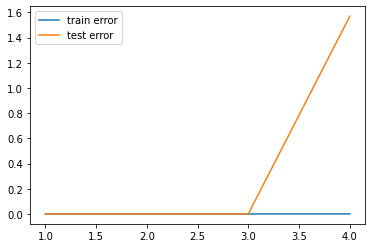

In [9]:
validation_curve(X_train_l,y_train,X_test_l,y_test)

In [10]:
def learning_curve(X_train,y_train,X_test,y_test,percentage):
    num_examples = len(X_train)
    percentage_acc = percentage
    train_errors = []
    test_errors = []
    percentages = []
    while percentage_acc <= 1.0:
        percentages.append(percentage_acc)
        to = int(num_examples * percentage_acc)
        train_error, test_error = ml(X_train[:to,:],y_train[:to,:],X_test,y_test)
        train_errors.append(train_error)
        test_errors.append(test_error)
        percentage_acc += percentage 
    plt.plot(percentages,train_errors,label='train error')
    plt.plot(percentages,test_errors,label='test error')
    plt.legend()    

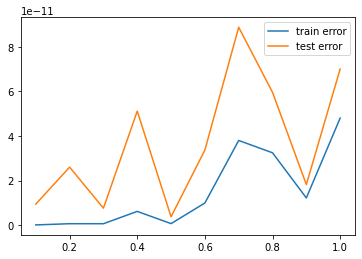

In [11]:
learning_curve(X_train_l[1],y_train,X_test_l[1],y_test,0.1)

In [12]:
def compute_folds(X_train,y_train,k):
    num_examples = len(X_train)
    fold_size = int(num_examples / k)
    X_folds = []
    y_folds = []
    for i in range(k):
        left = i*fold_size
        right = (i+1)*fold_size
        X_folds.append(X_train[left:right,:])
        y_folds.append(y_train[left:right,:])
    return X_folds, y_folds

In [13]:
def cross_validate(X_train,y_train,k):
    X_folds, y_folds = compute_folds(X_train,y_train,k)
    macro_train_error = 0
    macro_test_error = 0
    for i in range(k):
        X_train_f = np.concatenate(X_folds[:i] + X_folds[i+1:])
        y_train_f = np.concatenate(y_folds[:i] + y_folds[i+1:])
        X_test_f = X_folds[i]
        y_test_f = y_folds[i]
        micro_train_error, micro_test_error = ml(X_train_f,y_train_f,X_test_f,y_test_f)
        macro_test_error += micro_test_error
        macro_train_error += micro_train_error
    macro_train_error /= k
    macro_test_error /= k
    return macro_train_error, macro_test_error

In [14]:
cross_validate(X_train_l[1],y_train,5)

(2.977697211135211e-11, 3.1537474284974226e-11)